In [1]:
# 데이터 가져오기
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
#train.head()

In [2]:
#  datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

#train.head()

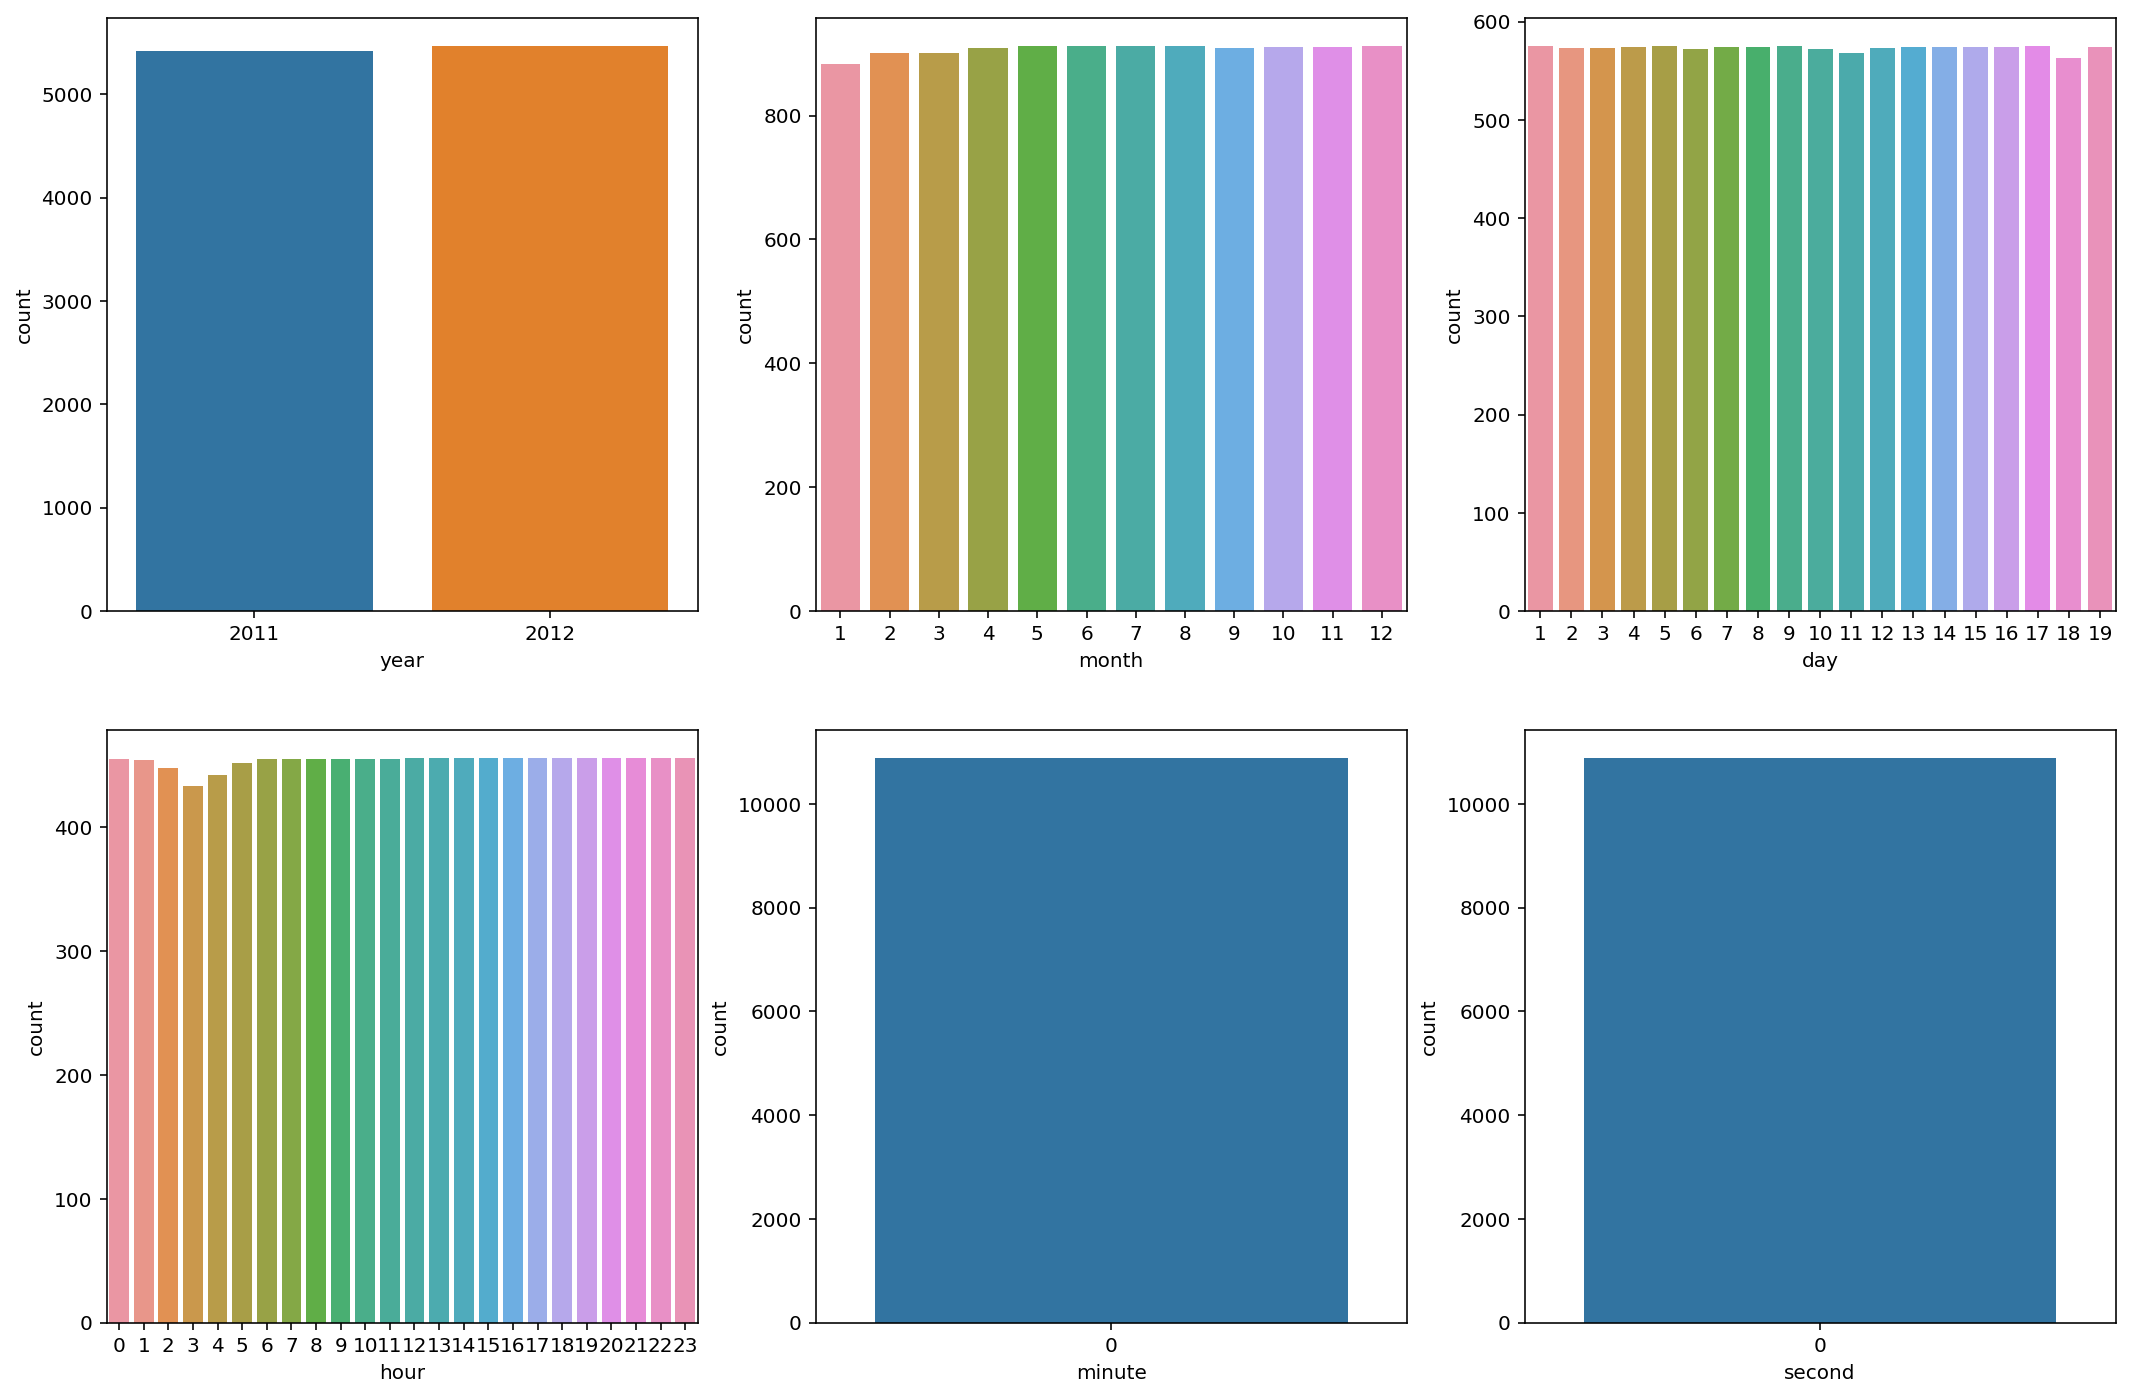

In [3]:
# year, month, day, hour, minute, second 데이터 개수 시각화하기

''' 항목별 count 합계 확인
figure, ((ax1, ax2,ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 12)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.barplot(data=train, x="year", y="count", ax=ax1).set_xlabel('year')
sns.barplot(data=train, x="month", y="count", ax=ax2).set_xlabel('month')
sns.barplot(data=train, x="day", y="count", ax=ax3).set_xlabel('day')
sns.barplot(data=train, x="hour", y="count", ax=ax4).set_xlabel('hour')
sns.barplot(data=train, x="minute", y="count", ax=ax5).set_xlabel('minute')
sns.barplot(data=train, x="second", y="count", ax=ax6).set_xlabel('second')

plt.show()
'''

figure, ((ax1, ax2,ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 12)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.countplot(data=train, x="year", ax=ax1).set_xlabel('year')
sns.countplot(data=train, x="month", ax=ax2).set_xlabel('month')
sns.countplot(data=train, x="day", ax=ax3).set_xlabel('day')
sns.countplot(data=train, x="hour", ax=ax4).set_xlabel('hour')
sns.countplot(data=train, x="minute", ax=ax5).set_xlabel('minute')
sns.countplot(data=train, x="second", ax=ax6).set_xlabel('second')

plt.show()

In [4]:
#X, y 컬럼 선택 및 train/test 데이터 분리

sel_feat = ['year','month','hour','season','holiday','workingday','weather','temp','atemp','humidity', 'windspeed']

X = train[sel_feat].values
y = train['count'].values

''' 항목별 분포 체크
for i in range(10):
    plt.scatter(X[:, i], y)
    plt.xlabel(sel_feat[i])
    plt.show()
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# LinearRegression 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse} , RMSE : {rmse}')


MSE: 19957.295306143846 , RMSE : 141.27029166156572


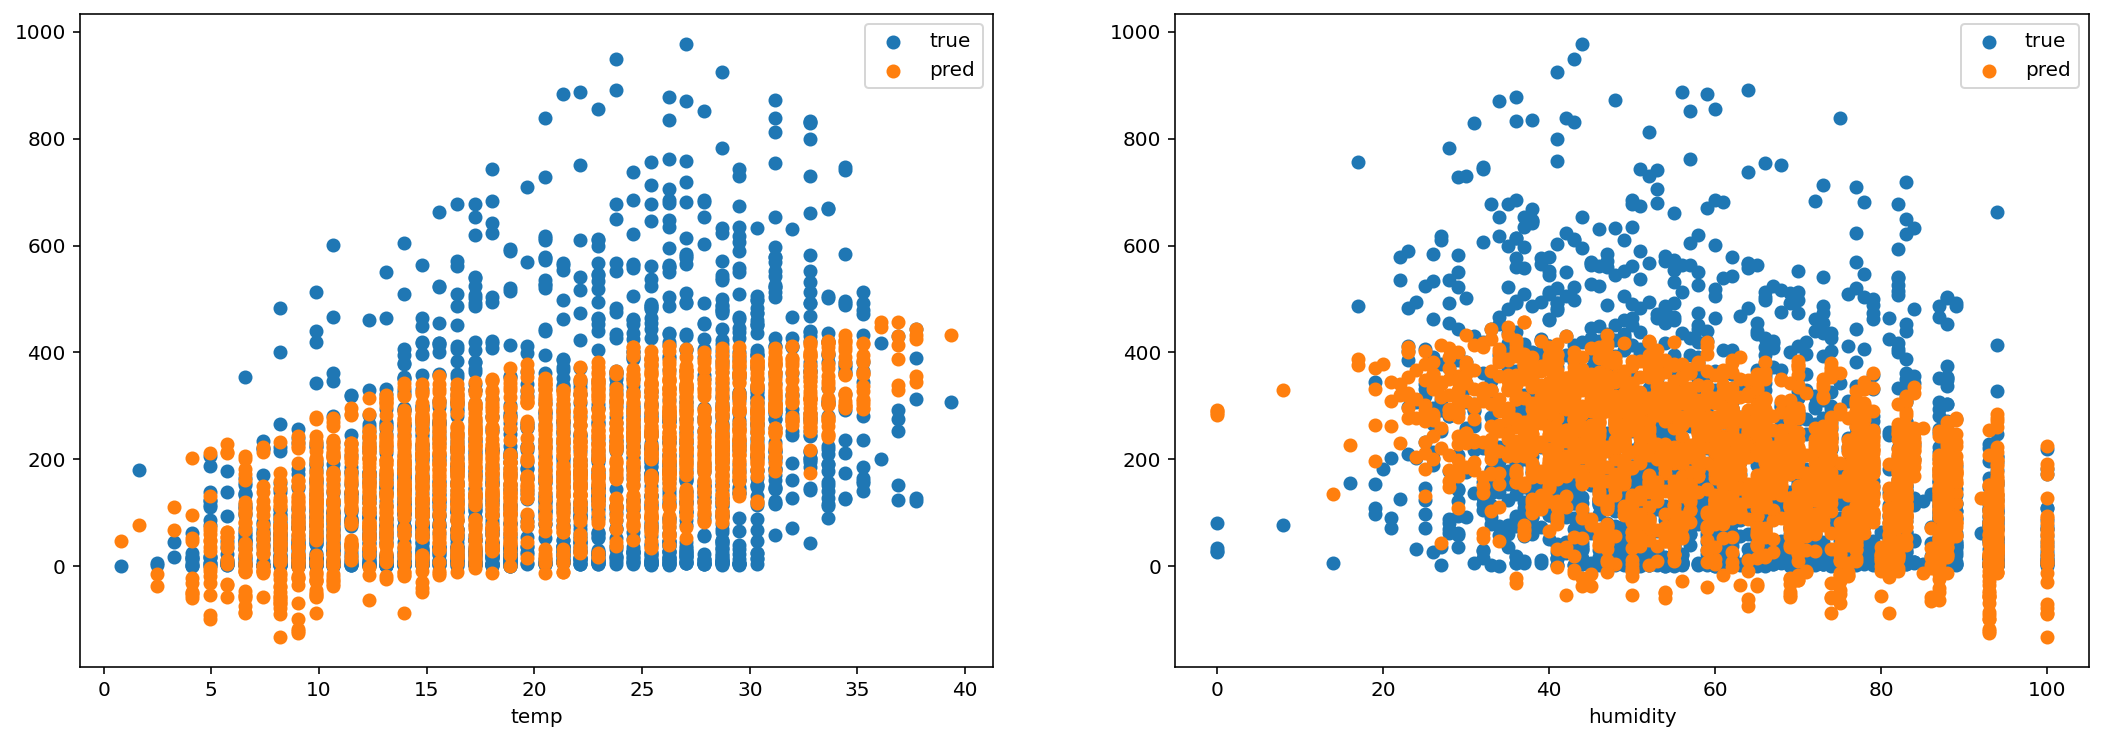

In [7]:
# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

''' 모든 항목 시각화 테스트
for i in range(10):
    plt.scatter(X_test[:, i], y_test, label="true")
    plt.scatter(X_test[:, i], predictions, label="pred")
    plt.xlabel(sel_feat[i])
    plt.legend()
    plt.show()
'''
plt.figure(figsize=(18, 6))

plt.subplot(121)
idx = sel_feat.index("temp")
plt.scatter(X_test[:, idx], y_test, label="true")
plt.scatter(X_test[:, idx], predictions, label="pred")
plt.xlabel(sel_feat[idx])
plt.legend()

plt.subplot(122)
idx = sel_feat.index("humidity")
plt.scatter(X_test[:, idx], y_test, label="true")
plt.scatter(X_test[:, idx], predictions, label="pred")
plt.xlabel(sel_feat[idx])
plt.legend()

plt.show()


